# Assignment 6, Part 1: WeatherPy

## Dependencies

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

## Generate the cities list

In [30]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


## Retrieve weather data from the cities list generated

In [41]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'

params = {
    'appid': weather_api_key,
    'units': units
}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Log the url, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Build query URL
    params['q'] = city
    response = requests.get(url, params=params).json()

    try:
        # Parse the JSON and retrieve data
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed']
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | olonkinbyen
Processing Record 2 of Set 1 | piti village
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | nar'yan-mar
Processing Record 6 of Set 1 | blackmans bay
Processing Record 7 of Set 1 | tiksi
Processing Record 8 of Set 1 | bredasdorp
Processing Record 9 of Set 1 | port-aux-francais
Processing Record 10 of Set 1 | howrah
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | holualoa
Processing Record 13 of Set 1 | cable beach
City not found. Skipping...
Processing Record 14 of Set 1 | badger
Processing Record 15 of Set 1 | edinburgh of the seven seas
Processing Record 16 of Set 1 | cabedelo
Processing Record 17 of Set 1 | martil
Processing Record 18 of Set 1 | la passe
Processing Record 19 of Set 1 | puerto natales
Processing Record 20 of Set 1 | vila franca do campo
Processing Record 21 of Set 1 | sao joao 

## Save data in pandas DataFrame

In [42]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          568
Lat           568
Lng           568
Max Temp      568
Humidity      568
Cloudiness    568
Wind Speed    568
Country       568
Date          568
dtype: int64

In [43]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,olonkinbyen,70.9221,-8.7187,5.52,86,100,3.90,SJ,1690331502
1,piti village,13.4626,144.6933,30.03,87,20,5.14,GU,1690331503
2,ribeira grande,38.5167,-28.7000,20.99,85,7,1.79,PT,1690331503
3,iqaluit,63.7506,-68.5145,5.85,86,100,2.57,CA,1690331503
4,nar'yan-mar,67.6713,53.0870,16.06,77,42,1.70,RU,1690331504


In [44]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

## Retrieve data from CSV file

In [81]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Rename the columns
city_data_df = city_data_df.rename(columns={'Lat': 'Latitude',
                                            'Lng': 'Longitude',
                                            'Max Temp': 'Max Temperature (C)',
                                            'Humidity': 'Humidity (%)',
                                            'Cloudiness': 'Cloudiness (%)',
                                            'Wind Speed': 'Wind Speed (m/s)'})

# Display sample data
city_data_df.head()

,City,Latitude,Longitude,Max Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date
City_ID,,,,,,,,,
0,olonkinbyen,70.9221,-8.7187,5.52,86,100,3.90,SJ,1690331502
1,piti village,13.4626,144.6933,30.03,87,20,5.14,GU,1690331503
2,ribeira grande,38.5167,-28.7000,20.99,85,7,1.79,PT,1690331503
3,iqaluit,63.7506,-68.5145,5.85,86,100,2.57,CA,1690331503
4,nar'yan-mar,67.6713,53.0870,16.06,77,42,1.70,RU,1690331504


## Scatter plots

### Function to create and save scatter plot
- Input 1: name of the column to be plotted against the latitude
- Input 2: a name to be given to the figure when it is saved
- Input 3: 'True' to save the figure as a PNG, 'False' (default) to only display it in the notebook

In [82]:
def scatter_plot(y_param, figname, savefig=False):
    # Use DataFrame generated
    global city_data_df

    # The X-axis will always show the lattitude
    x_param = 'Latitude'

    # Prepare scatter plot from DataFrame
    title = f"City Latitude vs. {y_param}"
    city_data_df.plot.scatter(x_param, y_param, grid=True, title=title)

    # Save figure as PNG
    if savefig:
        plt.savefig(f"output_data/{figname}.png")

    # Show chart
    plt.show()

### Display and save scatter plots
This section make use of the scatter_plot() function defined above for efficiency.

Fig1: Latitude vs Max Temperature (C)


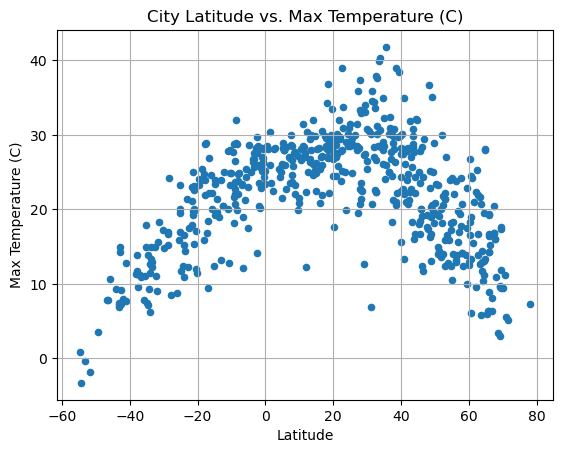

Fig2: Latitude vs Humidity (%)


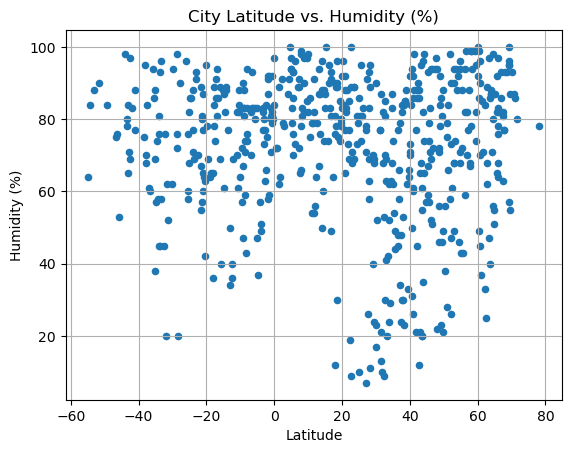

Fig3: Latitude vs Cloudiness (%)


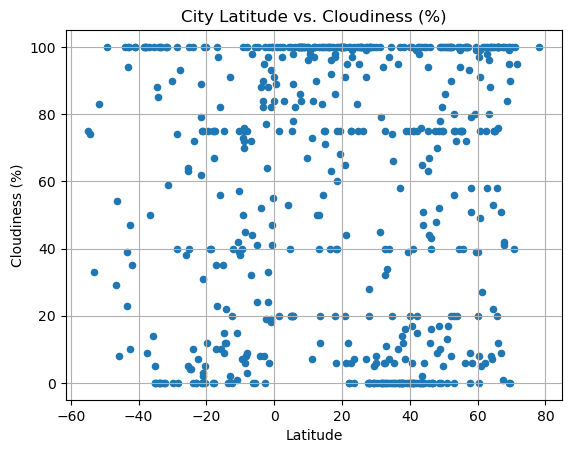

Fig4: Latitude vs Wind Speed (m/s)


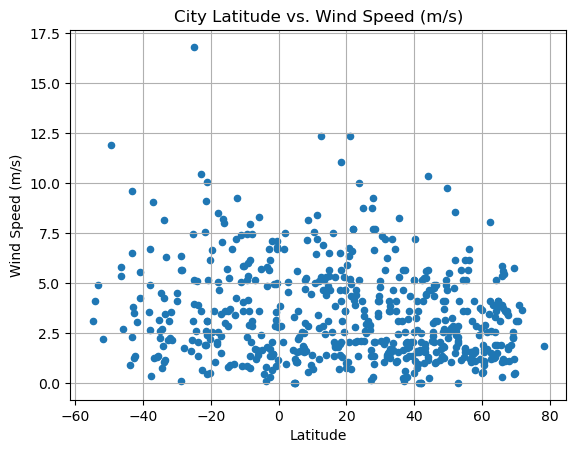

In [87]:
y_params = ['Max Temperature (C)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (m/s)' ]

for i, y_param in enumerate(y_params):
    figname = f"Fig{i+1}"
    print(f"{figname}: Latitude vs {y_param}")
    scatter_plot(y_param, figname, True)